# Train baseline clinical transformer Model for Survival
This is the training of the clinical transformer withoug using pre-trained weights from the self uspervised model.

In [1]:

import os
os.environ["XLA_FLAGS"] = "--xla_gpu_cuda_data_dir=/home/shenwanxiang/anaconda3"

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import tensorflow as tf
tf.test.is_gpu_available()
tf.__version__

tf.config.run_functions_eagerly(True)

import sys
sys.path.append('../codeocean/environment/clinical_transformer/')

2025-08-12 20:17:28.627277: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-12 20:17:28.692131: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-12 20:17:29.070671: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shenwanxiang/anaconda3/lib:
2025-08-12 20:17:29.070705: W tensorflow/compiler/xla/stream_exe

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2025-08-12 20:17:29.511381: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-12 20:17:29.546873: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-12 20:17:29.564114: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-12 20:17:29.564234: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at

In [2]:
from xai.models import Trainer
from xai.models import SurvivalTransformer
from xai.models import OptimizedSurvivalDataGenerator as SurvivalDataGenerator
from xai.losses.survival import cIndex_SigmoidApprox as cindex_loss
from xai.metrics.survival import sigmoid_concordance as cindex_metric

In [3]:
import pandas as pd
from samecode.random import set_seed

## Dataset

In [4]:
data = pd.read_csv('./data/dataset-train.data.csv')
features = data.columns[-44:].tolist()

In [5]:
features

['CANCER',
 'Bcell_general',
 'Memory_Bcell',
 'Naive_Bcell',
 'Plasma_cell',
 'CD4_Tcell',
 'CD8_Tcell',
 'Memory_Tcell',
 'Naive_Tcell',
 'Tcell_general',
 'Cytotoxic_Tcell',
 'Exhausted_Tcell',
 'Immune_checkpoint',
 'Treg',
 'NKcell',
 'Innate_lymphoid_cell',
 'cDC',
 'pDC',
 'Macrophage',
 'Monocyte',
 'Myeloid',
 'Granulocyte',
 'Mast',
 'Erythrocyte',
 'Platelet',
 'Stem',
 'Stroma',
 'Pericyte',
 'Fibroblast',
 'Endothelial',
 'Epithelial',
 'Mesothelial',
 'Adipocyte',
 'Hepatocyte',
 'Pancreatic',
 'Pneumocyte',
 'Apoptosis_pathway',
 'IFNg_pathway',
 'TGFb_pathway',
 'Cytokine',
 'Cell_proliferation',
 'TLS',
 'Genome_integrity',
 'Reference']

## Parameters

In [6]:
max_features_percentile=100
test_size=0.3 # fraction of samples used for testing
repetitions=10 # number replicates (training / testing) random splits to evaluate variability.

mode='survival'
learning_rate=0.0001
epochs=300
verbose=1
seed=0
embedding_size = 128
num_heads = 2
num_layers = 2

## Training

In [7]:
!rm -r ./results/runs/Survival/

/bin/sh: /home/shenwanxiang/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/sh)
rm: cannot remove './results/runs/Survival/': No such file or directory


In [8]:
outdir = './results/runs/Survival/'
set_seed(0)

trainer = Trainer(
    out_dir = outdir,
    max_features_percentile=max_features_percentile,
    test_size=test_size,
    mode=mode,
    model=SurvivalTransformer, 
    dataloader=SurvivalDataGenerator,
    loss=cindex_loss,
    metrics=[cindex_metric]
)

trainer.setup_data(
    data, 
    discrete_features = [],
    continuous_features = features,
    target=['time', 'event']
)

trainer.setup_model(
    learning_rate=learning_rate,
    embedding_size=embedding_size,
    num_heads=num_heads,
    num_layers=num_layers,
    batch_size_max=True,
    save_best_only=True
)

trainer.fit(repetitions=repetitions, epochs=epochs, verbose=verbose, seed=seed)

/home/shenwanxiang/.local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO	2025-08-12 20:17:49,175	Setting up working directory: ./results/runs/Survival/
INFO	2025-08-12 20:17:49,176	Number of continuous features: 44
INFO	2025-08-12 20:17:49,176	Number of discrete features: 0
INFO	2025-08-12 20:17:49,176	Number of samples: 562
INFO	2025-08-12 20:17:49,181	Number of classes: 1
INFO	2025-08-12 20:17:49,181	RUN ID: fold-0_id-0
INFO	2025-08-12 20:17:49,181	RUN ID out directory: ./results/runs/Survival//fold-0_id-0/
INFO	2025-08-12 20:17:49,240	Training samples: 393
INFO	2025-08-12 20:17:49,240	Testing samples: 169
INFO	2025-08-12 20:17:49,243	Number of features at 100th percentile: 44 that are non nans
2025-08-12 20:17:49.244489: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] su

Epoch 1/300
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2025-08-12 20:17:50.031740: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
WARNING	2025-08-12 20:17:50,201	AutoGraph could not transform <function cIndex_SigmoidApprox at 0x7f675f1e80e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate th

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


WARNING	2025-08-12 20:17:50,309	AutoGraph could not transform <function sigmoid_concordance at 0x7f6758580560> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 272ms/step - loss: 0.4934 - sigmoid_concordance: 0.5123 - val_loss: 0.4991 - val_sigmoid_concordance: 0.5426
Epoch 2/300
1/1 [==============================] - 0s 139ms/step - loss: 0.4924 - sigmoid_concordance: 0.5120 - val_loss: 0.4988 - val_sigmoid_concordance: 0.5579
Epoch 3/300
1/1 [==============================] - 0s 135ms/step - loss: 0.4977 - sigmoid_concordance: 0.5082 - val_loss: 0.4987 - val_sigmoid_concordance: 0.5677
Epoch 4/300
1/1 [==============================] - 0s 137ms/step - loss: 0.5168 - sigmoid_concordance: 0.4672 - val_loss: 0.4986 - val_sigmoid_concordance: 0.5677
Epoch 5/300
1/1 [==============================] - 0s 137

INFO	2025-08-12 20:18:31,891	RUN ID: fold-1_id-1
INFO	2025-08-12 20:18:31,891	RUN ID out directory: ./results/runs/Survival//fold-1_id-1/
INFO	2025-08-12 20:18:31,950	Training samples: 393
INFO	2025-08-12 20:18:31,951	Testing samples: 169
INFO	2025-08-12 20:18:31,954	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 200ms/step - loss: 0.4895 - sigmoid_concordance: 0.5216 - val_loss: 0.5010 - val_sigmoid_concordance: 0.4978
Epoch 2/300
1/1 [==============================] - 0s 139ms/step - loss: 0.5033 - sigmoid_concordance: 0.4938 - val_loss: 0.5008 - val_sigmoid_concordance: 0.4983
Epoch 3/300
1/1 [==============================] - 0s 141ms/step - loss: 0.4979 - sigmoid_concordance: 0.5054 - val_loss: 0.5007 - val_sigmoid_concordance: 0.4984
Epoch 4/300
1/1 [==============================] - 0s 136ms/step - loss: 0.5159 - sigmoid_concordance: 0.4680 - val_loss: 0.5005 - val_sigmoid_concordance: 0.5005
Epoch 5/300
1/1 [==============================] - 0s 137ms/step - loss: 0.4938 - sigmoid_concordance: 0.5109 - val_loss: 0.5002 - val_sigmoid_concordance: 0.5075
Epoch 6/300
1/1 [==============================] - 0s 136ms/step - loss: 0.4956 - sigmoid_concordance: 0.5034 - val_loss: 0.4999 - val_sigmoid_concordance: 0.5115
Epoch 7/300
1/1 [=================

INFO	2025-08-12 20:19:14,364	RUN ID: fold-2_id-2
INFO	2025-08-12 20:19:14,364	RUN ID out directory: ./results/runs/Survival//fold-2_id-2/
INFO	2025-08-12 20:19:14,422	Training samples: 393
INFO	2025-08-12 20:19:14,423	Testing samples: 169
INFO	2025-08-12 20:19:14,426	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 201ms/step - loss: 0.5142 - sigmoid_concordance: 0.4755 - val_loss: 0.5007 - val_sigmoid_concordance: 0.4861
Epoch 2/300
1/1 [==============================] - 0s 139ms/step - loss: 0.4963 - sigmoid_concordance: 0.5075 - val_loss: 0.5005 - val_sigmoid_concordance: 0.4904
Epoch 3/300
1/1 [==============================] - 0s 137ms/step - loss: 0.5047 - sigmoid_concordance: 0.4980 - val_loss: 0.5004 - val_sigmoid_concordance: 0.4931
Epoch 4/300
1/1 [==============================] - 0s 139ms/step - loss: 0.5123 - sigmoid_concordance: 0.4838 - val_loss: 0.5003 - val_sigmoid_concordance: 0.4989
Epoch 5/300
1/1 [==============================] - 0s 137ms/step - loss: 0.5020 - sigmoid_concordance: 0.4920 - val_loss: 0.5002 - val_sigmoid_concordance: 0.4992
Epoch 6/300
1/1 [==============================] - 0s 138ms/step - loss: 0.5081 - sigmoid_concordance: 0.4851 - val_loss: 0.5001 - val_sigmoid_concordance: 0.5047
Epoch 7/300
1/1 [=================

INFO	2025-08-12 20:19:57,370	RUN ID: fold-3_id-3
INFO	2025-08-12 20:19:57,371	RUN ID out directory: ./results/runs/Survival//fold-3_id-3/
INFO	2025-08-12 20:19:57,430	Training samples: 393
INFO	2025-08-12 20:19:57,430	Testing samples: 169
INFO	2025-08-12 20:19:57,433	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 199ms/step - loss: 0.5091 - sigmoid_concordance: 0.4745 - val_loss: 0.4997 - val_sigmoid_concordance: 0.5110
Epoch 2/300
1/1 [==============================] - 0s 137ms/step - loss: 0.4946 - sigmoid_concordance: 0.5103 - val_loss: 0.4997 - val_sigmoid_concordance: 0.5117
Epoch 3/300
1/1 [==============================] - 0s 139ms/step - loss: 0.4891 - sigmoid_concordance: 0.5268 - val_loss: 0.4996 - val_sigmoid_concordance: 0.5151
Epoch 4/300
1/1 [==============================] - 0s 138ms/step - loss: 0.5149 - sigmoid_concordance: 0.4727 - val_loss: 0.4995 - val_sigmoid_concordance: 0.5183
Epoch 5/300
1/1 [==============================] - 0s 140ms/step - loss: 0.5094 - sigmoid_concordance: 0.4825 - val_loss: 0.4995 - val_sigmoid_concordance: 0.5184
Epoch 6/300
1/1 [==============================] - 0s 138ms/step - loss: 0.5019 - sigmoid_concordance: 0.5008 - val_loss: 0.4994 - val_sigmoid_concordance: 0.5225
Epoch 7/300
1/1 [=================

INFO	2025-08-12 20:20:39,582	RUN ID: fold-4_id-4
INFO	2025-08-12 20:20:39,582	RUN ID out directory: ./results/runs/Survival//fold-4_id-4/
INFO	2025-08-12 20:20:39,637	Training samples: 393
INFO	2025-08-12 20:20:39,637	Testing samples: 169
INFO	2025-08-12 20:20:39,640	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 191ms/step - loss: 0.4957 - sigmoid_concordance: 0.5102 - val_loss: 0.5008 - val_sigmoid_concordance: 0.4656
Epoch 2/300
1/1 [==============================] - 0s 135ms/step - loss: 0.4879 - sigmoid_concordance: 0.5228 - val_loss: 0.5007 - val_sigmoid_concordance: 0.4682
Epoch 3/300
1/1 [==============================] - 0s 135ms/step - loss: 0.5085 - sigmoid_concordance: 0.4763 - val_loss: 0.5007 - val_sigmoid_concordance: 0.4706
Epoch 4/300
1/1 [==============================] - 0s 138ms/step - loss: 0.5170 - sigmoid_concordance: 0.4659 - val_loss: 0.5006 - val_sigmoid_concordance: 0.4801
Epoch 5/300
1/1 [==============================] - 0s 138ms/step - loss: 0.4947 - sigmoid_concordance: 0.5097 - val_loss: 0.5004 - val_sigmoid_concordance: 0.4855
Epoch 6/300
1/1 [==============================] - 0s 144ms/step - loss: 0.5126 - sigmoid_concordance: 0.4707 - val_loss: 0.5003 - val_sigmoid_concordance: 0.4898
Epoch 7/300
1/1 [=================

INFO	2025-08-12 20:21:21,139	RUN ID: fold-5_id-5
INFO	2025-08-12 20:21:21,140	RUN ID out directory: ./results/runs/Survival//fold-5_id-5/
INFO	2025-08-12 20:21:21,195	Training samples: 393
INFO	2025-08-12 20:21:21,196	Testing samples: 169
INFO	2025-08-12 20:21:21,199	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 190ms/step - loss: 0.5156 - sigmoid_concordance: 0.4702 - val_loss: 0.4988 - val_sigmoid_concordance: 0.5339
Epoch 2/300
1/1 [==============================] - 0s 134ms/step - loss: 0.5082 - sigmoid_concordance: 0.4844 - val_loss: 0.4988 - val_sigmoid_concordance: 0.5344
Epoch 3/300
1/1 [==============================] - 0s 145ms/step - loss: 0.5031 - sigmoid_concordance: 0.4915 - val_loss: 0.4987 - val_sigmoid_concordance: 0.5369
Epoch 4/300
1/1 [==============================] - 0s 123ms/step - loss: 0.5120 - sigmoid_concordance: 0.4689 - val_loss: 0.4988 - val_sigmoid_concordance: 0.5349
Epoch 5/300
1/1 [==============================] - 0s 124ms/step - loss: 0.5051 - sigmoid_concordance: 0.4889 - val_loss: 0.4987 - val_sigmoid_concordance: 0.5376
Epoch 6/300
1/1 [==============================] - 0s 122ms/step - loss: 0.5178 - sigmoid_concordance: 0.4686 - val_loss: 0.4987 - val_sigmoid_concordance: 0.5381
Epoch 7/300
1/1 [=================

INFO	2025-08-12 20:22:02,502	RUN ID: fold-6_id-6
INFO	2025-08-12 20:22:02,502	RUN ID out directory: ./results/runs/Survival//fold-6_id-6/
INFO	2025-08-12 20:22:02,560	Training samples: 393
INFO	2025-08-12 20:22:02,560	Testing samples: 169
INFO	2025-08-12 20:22:02,563	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 192ms/step - loss: 0.4985 - sigmoid_concordance: 0.4992 - val_loss: 0.5018 - val_sigmoid_concordance: 0.4879
Epoch 2/300
1/1 [==============================] - 0s 135ms/step - loss: 0.4761 - sigmoid_concordance: 0.5484 - val_loss: 0.5016 - val_sigmoid_concordance: 0.4891
Epoch 3/300
1/1 [==============================] - 0s 129ms/step - loss: 0.4803 - sigmoid_concordance: 0.5307 - val_loss: 0.5015 - val_sigmoid_concordance: 0.4905
Epoch 4/300
1/1 [==============================] - 0s 133ms/step - loss: 0.4975 - sigmoid_concordance: 0.5004 - val_loss: 0.5012 - val_sigmoid_concordance: 0.4925
Epoch 5/300
1/1 [==============================] - 0s 131ms/step - loss: 0.4983 - sigmoid_concordance: 0.5071 - val_loss: 0.5009 - val_sigmoid_concordance: 0.4947
Epoch 6/300
1/1 [==============================] - 0s 130ms/step - loss: 0.4894 - sigmoid_concordance: 0.5191 - val_loss: 0.5007 - val_sigmoid_concordance: 0.4944
Epoch 7/300
1/1 [=================

INFO	2025-08-12 20:22:44,227	RUN ID: fold-7_id-7
INFO	2025-08-12 20:22:44,228	RUN ID out directory: ./results/runs/Survival//fold-7_id-7/
INFO	2025-08-12 20:22:44,283	Training samples: 393
INFO	2025-08-12 20:22:44,284	Testing samples: 169
INFO	2025-08-12 20:22:44,287	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 202ms/step - loss: 0.5176 - sigmoid_concordance: 0.4632 - val_loss: 0.5008 - val_sigmoid_concordance: 0.4780
Epoch 2/300
1/1 [==============================] - 0s 130ms/step - loss: 0.5064 - sigmoid_concordance: 0.4856 - val_loss: 0.5006 - val_sigmoid_concordance: 0.4909
Epoch 3/300
1/1 [==============================] - 0s 122ms/step - loss: 0.5005 - sigmoid_concordance: 0.5001 - val_loss: 0.5006 - val_sigmoid_concordance: 0.4881
Epoch 4/300
1/1 [==============================] - 0s 131ms/step - loss: 0.4912 - sigmoid_concordance: 0.5185 - val_loss: 0.5004 - val_sigmoid_concordance: 0.4930
Epoch 5/300
1/1 [==============================] - 0s 136ms/step - loss: 0.4968 - sigmoid_concordance: 0.5078 - val_loss: 0.5003 - val_sigmoid_concordance: 0.5004
Epoch 6/300
1/1 [==============================] - 0s 138ms/step - loss: 0.5189 - sigmoid_concordance: 0.4643 - val_loss: 0.5002 - val_sigmoid_concordance: 0.5052
Epoch 7/300
1/1 [=================

INFO	2025-08-12 20:23:26,591	RUN ID: fold-8_id-8
INFO	2025-08-12 20:23:26,592	RUN ID out directory: ./results/runs/Survival//fold-8_id-8/
INFO	2025-08-12 20:23:26,651	Training samples: 393
INFO	2025-08-12 20:23:26,651	Testing samples: 169
INFO	2025-08-12 20:23:26,654	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 199ms/step - loss: 0.5157 - sigmoid_concordance: 0.4599 - val_loss: 0.4962 - val_sigmoid_concordance: 0.5530
Epoch 2/300
1/1 [==============================] - 0s 150ms/step - loss: 0.5062 - sigmoid_concordance: 0.4816 - val_loss: 0.4960 - val_sigmoid_concordance: 0.5545
Epoch 3/300
1/1 [==============================] - 0s 132ms/step - loss: 0.4962 - sigmoid_concordance: 0.5108 - val_loss: 0.4961 - val_sigmoid_concordance: 0.5563
Epoch 4/300
1/1 [==============================] - 0s 136ms/step - loss: 0.5076 - sigmoid_concordance: 0.4880 - val_loss: 0.4960 - val_sigmoid_concordance: 0.5587
Epoch 5/300
1/1 [==============================] - 0s 140ms/step - loss: 0.5005 - sigmoid_concordance: 0.5023 - val_loss: 0.4960 - val_sigmoid_concordance: 0.5604
Epoch 6/300
1/1 [==============================] - 0s 139ms/step - loss: 0.4906 - sigmoid_concordance: 0.5225 - val_loss: 0.4959 - val_sigmoid_concordance: 0.5640
Epoch 7/300
1/1 [=================

INFO	2025-08-12 20:24:08,764	RUN ID: fold-9_id-9
INFO	2025-08-12 20:24:08,764	RUN ID out directory: ./results/runs/Survival//fold-9_id-9/
INFO	2025-08-12 20:24:08,823	Training samples: 393
INFO	2025-08-12 20:24:08,824	Testing samples: 169
INFO	2025-08-12 20:24:08,827	Number of features at 100th percentile: 44 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 199ms/step - loss: 0.5179 - sigmoid_concordance: 0.4586 - val_loss: 0.5030 - val_sigmoid_concordance: 0.4329
Epoch 2/300
1/1 [==============================] - 0s 138ms/step - loss: 0.5077 - sigmoid_concordance: 0.4868 - val_loss: 0.5026 - val_sigmoid_concordance: 0.4368
Epoch 3/300
1/1 [==============================] - 0s 140ms/step - loss: 0.4922 - sigmoid_concordance: 0.5176 - val_loss: 0.5023 - val_sigmoid_concordance: 0.4378
Epoch 4/300
1/1 [==============================] - 0s 143ms/step - loss: 0.5075 - sigmoid_concordance: 0.4856 - val_loss: 0.5018 - val_sigmoid_concordance: 0.4466
Epoch 5/300
1/1 [==============================] - 0s 140ms/step - loss: 0.5069 - sigmoid_concordance: 0.4916 - val_loss: 0.5015 - val_sigmoid_concordance: 0.4505
Epoch 6/300
1/1 [==============================] - 0s 140ms/step - loss: 0.4885 - sigmoid_concordance: 0.5238 - val_loss: 0.5012 - val_sigmoid_concordance: 0.4535
Epoch 7/300
1/1 [=================

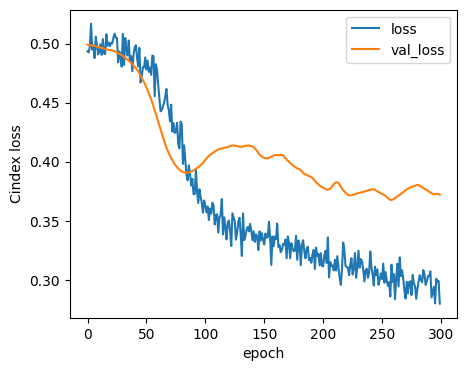

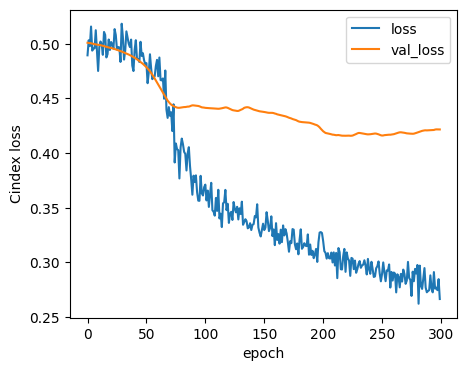

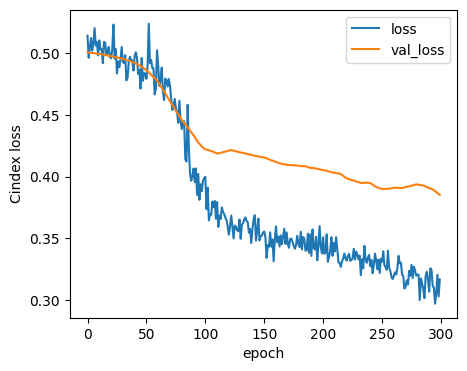

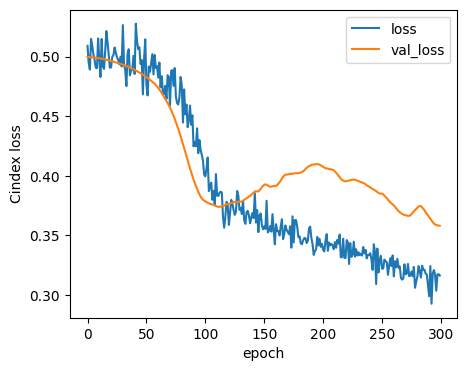

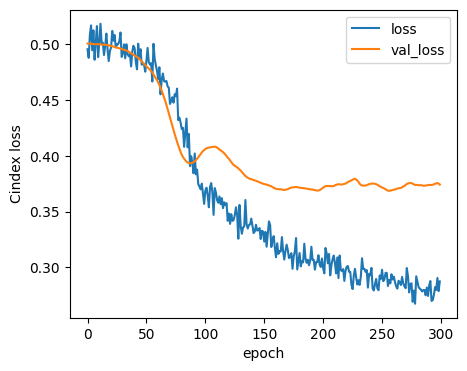

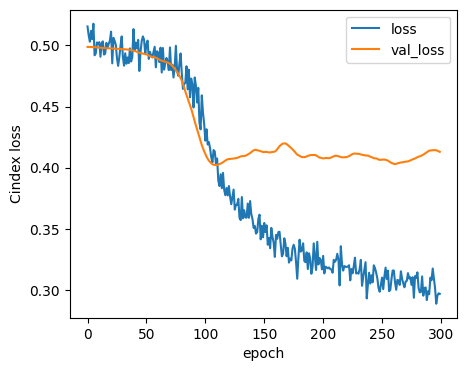

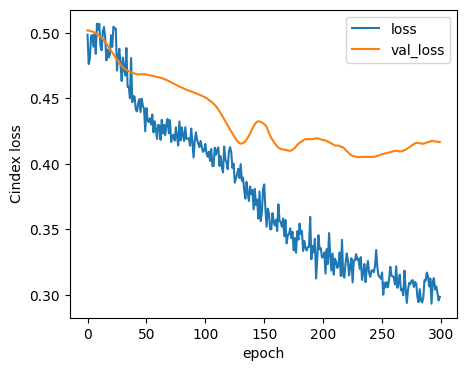

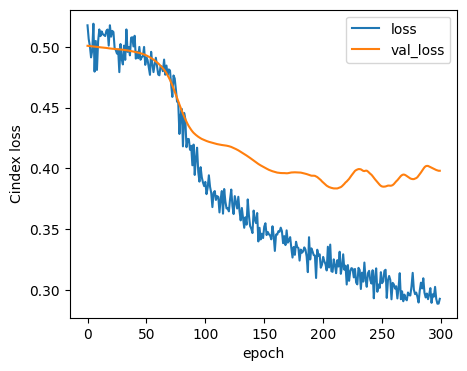

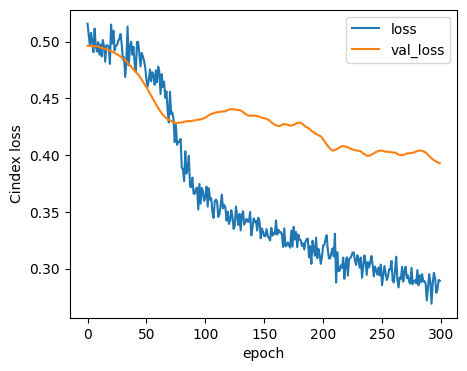

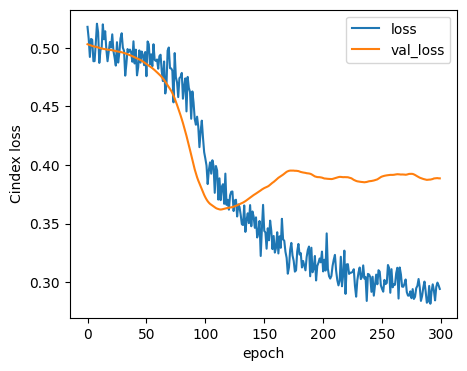

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
for i in range(repetitions):
    dfh = pd.read_csv("./results/runs/Survival///fold-%s_id-%s/history.csv" % (i,i), index_col=0)
    fig, ax=plt.subplots(figsize=(5,4))
    dfh[['loss', 'val_loss']].plot(ax=ax)
    ax.set_ylabel('Cindex loss')